In [36]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

import pingouin as pg
from scipy import stats
import statsmodels.api as sm

In [37]:
!apt-get install -y fonts-nanum
!fc-chache -fv
!rm ~/.cache/matplotlib -rf

'apt-get'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


'fc-chache'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.
'rm'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


In [38]:
sns.set_theme(style="darkgrid")
plt.rc('font', family = 'Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

In [51]:
ist_df = pd.read_csv('./data/05_1.IST.csv', encoding = 'cp949')
ist_df.head()

,회사,수명1,수명2,수명3,수명4,수명5
0,1,50,52,51,50,51
1,1,52,54,53,52,53
2,2,51,51,51,51,51
3,2,52,52,52,52,52
4,1,52,54,53,50,53


In [52]:
ist_df['회사'].replace({1:'A타이어', 2:'B타이어'}, inplace=True)
ist_df['회사'] = ist_df['회사'].astype('category')

ist_df.head()

C:\Users\user\AppData\Local\Temp\ipykernel_10336\2695397480.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ist_df['회사'].replace({1:'A타이어', 2:'B타이어'}, inplace=True)


,회사,수명1,수명2,수명3,수명4,수명5
0,A타이어,50,52,51,50,51
1,A타이어,52,54,53,52,53
2,B타이어,51,51,51,51,51
3,B타이어,52,52,52,52,52
4,A타이어,52,54,53,50,53


In [41]:
# 기술통계
ist_df.groupby('회사')['수명1'].describe().round(2)

C:\Users\user\AppData\Local\Temp\ipykernel_10336\3385752380.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ist_df.groupby('회사')['수명1'].describe().round(2)


,count,mean,std,min,25%,50%,75%,max
회사,,,,,,,,
A타이어,31.0,48.94,3.33,42.0,47.0,49.0,51.0,56.0
B타이어,35.0,51.69,3.77,44.0,50.0,52.0,55.0,59.0


In [42]:
# t-test
# 차이가 있는 경우

x = ist_df['수명1'][ist_df['회사'] == 'A타이어']
y = ist_df['수명1'][ist_df['회사'] == 'B타이어']

In [43]:
pg.ttest(x,y,
         paired = False, # 서로 독립적인 집단
         alternative = "two-sided",
         correction = False).round(3)

#correction = False : 등분산일 때 

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-3.124,64,two-sided,0.003,"[-4.51, -0.99]",0.77,13.517,0.868


p값이 0.003 < 0.05 ; 귀무가설 기각. A타이어와 B타이어의 수명에는 차이가 있다.

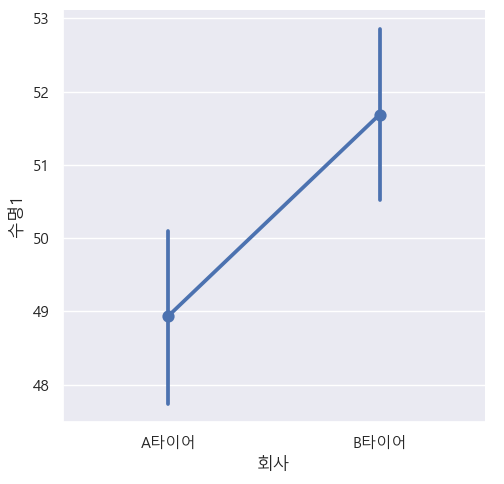

In [44]:
# 그래프

sns.catplot(x = "회사",
            y = "수명1",
            kind = "point",
            data = ist_df)
plt.show()

In [45]:
# 차이가 없는 경우
x = ist_df['수명2'][ist_df['회사'] == 'A타이어']
y = ist_df['수명2'][ist_df['회사'] == 'B타이어']

pg.ttest(x,y,
         paired = False, # 서로 독립적인 집단
         alternative = "two-sided",
         correction = False).round(3)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-0.852,64,two-sided,0.397,"[-2.51, 1.01]",0.21,0.344,0.134


p값이 0.397 > 0.05 ; 귀무가설 채택. A타이어와 B타이어의 수명에는 차이가 없다.

두 타이어 중 어떤 것이 더 좋은지 모름 -> 양측 검정
내가 개발한 타이어가 중요 -> 단측 검정

In [46]:
# 등분산 검정 : 등분산이면 지금까지 분석한 것이 문제 없음

pg.homoscedasticity(ist_df,
                    dv = "수명1",
                    group =  '회사') # 종속 변수 dependent valiable

,W,pval,equal_var
levene,0.195988,0.659471,True


등분산이다.

In [47]:
# 이분산일 때 (welch's test)

pg.homoscedasticity(ist_df,
                    dv = "수명4",
                    group =  '회사')

,W,pval,equal_var
levene,7.02041,0.010141,False


In [48]:
# 이분산인 경우 양측 검정
x = ist_df['수명4'][ist_df['회사'] == 'A타이어']
y = ist_df['수명4'][ist_df['회사'] == 'B타이어']

pg.ttest(x,y,
         paired = False, # 서로 독립적인 집단
         alternative = "two-sided",
         correction = True).round(3)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-4.082,52.522,two-sided,0.0,"[-4.44, -1.51]",0.972,181.419,0.973


두 타이어 간 차이가 있다.

In [49]:
# 정규성 검정

pg.normality(ist_df,
             dv = '수명1',
             group = '회사')

,W,pval,normal
회사,,,
A타이어,0.976345,0.705453,True
B타이어,0.959988,0.228474,True


In [54]:
# 정규성 검정
# 등분산인데 정규성은 불통

pg.normality(ist_df,
             dv = '수명5',
             group = '회사')

,W,pval,normal
회사,,,
A타이어,0.917587,0.020381,False
B타이어,0.914812,0.010135,False


In [ ]:
# 비모수일 때

x = ist_df['수명5'][ist_df['회사'] == 'A타이어']
y = ist_df['수명5'][ist_df['회사'] == 'B타이어']

# Mann-Whitney u-test
pg.ttest(x,y,
         alternative = "two-sided").round(3)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-0.98,63.948,two-sided,0.331,"[-4.04, 1.38]",0.24,0.38,0.16


두 타이어 간 차이가 없다.

### 순서
    1. 양측 검정
    2. 등분산 가정 O if not: 이분산
    3. 정규성 검정 O if not: 비모수